# SHAP 값을 사용하여 machine learning 모델 작동 방식 설명

출처: [https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137](https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)

# 각 feature가 모델의 모든 예측에 어떻게 영향을 미치는지 보여주는 tool을 사용하는 방법을 배웁니다.

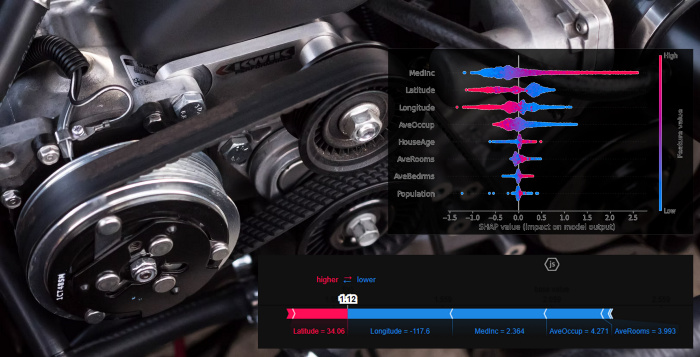

Machine learning 모델은 해석을 어렵게 만드는 블랙박스가 있습니다. 모델의 output에 영향을 미치는 주요 features가 무엇인지 이해하려면 이러한 문제를 해결하는 explainable machine learning 기술이 필요합니다.

이러한 기술 중 하나는 각 feature가 모델에 미치는 영향을 설명하는데 사용되는 SHAP method이며, 데이터 세트 및 당면한 문제에 대한 local 및 global 분석을 가능하게 합니다.

# SHAP Values
SHAP (**SH**apley **A**dditive ex**P**lanations)은 협동 게임 이론을 기반으로 하는 방법으로 machine learning 모델의 투명성과 해석 가능성을 높이는 데 사용됩니다.

예를 들어, linear 모델은 각 feature의 전체적인 importance에 대한 metric으로 coefficients를 사용할 수 있지만 variable 자체의 스케일에 따라 크기가 조정되므로 왜곡과 오역이 발생할 수 있습니다. 또한, 이 coefficients는 feature의 local importance와 값이 더 낮거나 더 높을 때 어떻게 변하는지를 설명할 수 없습니다. 트리 기반 모델의 feature importances에 대해서도 마찬가지이며, 이것이 SHAP가 모델의 해석 가능성에 유용한 이유입니다.

> important: SHAP는 모델 예측에 대한 각 feature의 기여도 또는 중요성을 보여주지만, 예측 자체의 quality를 평가하지는 않습니다.

SHAP은 각 예제 또는 관찰에 대해 모델 output에 대한 각 feature의 개별 기여도를 공개합니다.

California Housing Dataset [1,2](scikit-learn 라이브러리에서 사용 가능)이 주어지면 단일 관측치를 분리하고, 이 단일 데이터 포인트에 대한 SHAP 값을 계산할 수 있습니다.

In [2]:
shap.plots.waterfall(shap_values[x])

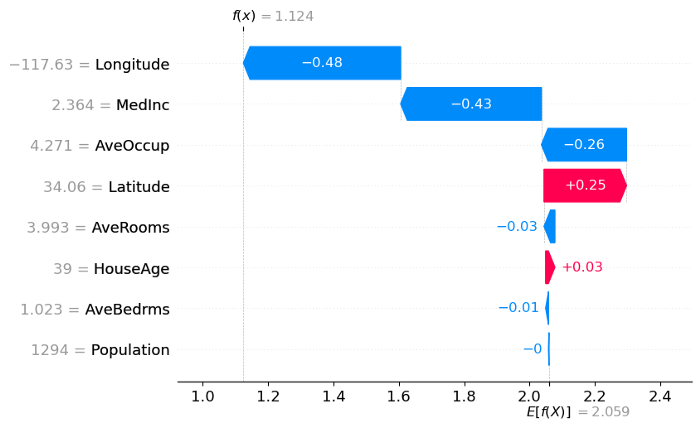

위의 waterfall에서 x축은 주택 가격인 target variable의 값을 가지고 있습니다. x는 선택된 관측값이고, f(x)는 input x가 주어졌을 때의 모델 예측 값, E[f(x)]는 target variable의 기댓값, 즉, 모든 예측의 평균입니다. (```.mean(model.predict(X))```)

이 observation에서 각 feature에 대한 SHAP 값은 bar의 길이로 제공됩니다. 위의 예에서 Longitude의 SHAP 값은 -0.48이고, Latitude의 SHAP 값은 +0.25입니다. 모든 SHAP 값의 합은 $E[f(x)] — f(x)$와 같습니다.

absolute SHAP 값은 단일 feature가 예측에 얼마나 많은 영향을 미쳤는지 보여줍니다. 따라서, Longitude가 가장 1번째, MedInc가 2번째, AveOccup이 3번째, Population이 예측에 가장 적게 기여한 feature였습니다.

이러한 SHAP 값은 이 observation에만 유효합니다. 다른 데이터 포인트를 사용하면 SHAP 값이 변경됩니다. 전체 데이터 세트에 대한 feature importances 또는 기여도를 이해하기 위해 다른 plot인 bee swarm plot을 사용합니다.

In [ ]:
shap.plots.beeswarm(shap_values)

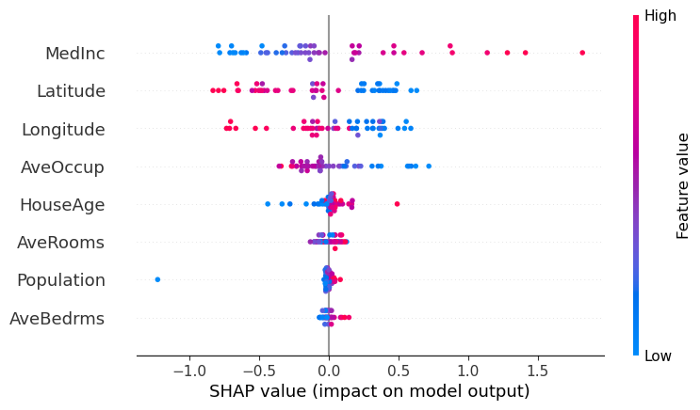

예를 들어, Latitude 변수의 값이 높으면 예측에 대한 negative 기여도가 높고 값이 낮으면 positive 기여도가 높습니다.

MedInc 변수는 값이 높을 때, positive 기여도가 매우 높고 값이 낮으면 negative 기여도를 보입니다. Population은 값이 높든 낮든 예측에 거의 기여하지 않습니다.

모든 변수는 global feature importance의 순서로 표시되며 첫 번째가 가장 중요하고 마지막이 가장 덜 중요한 것입니다.

효과적으로 SHAP는 feature importances를 사용하여 global 기여도와 beeswarm plot의 scattering에 의해서 각 인스턴스에 대한 local feature 기여도를 모두 보여줄 수 있습니다.

# Using SHAP values in Python
이 섹션의 코드를 github에서 사용할 수 있도록 만들었습니다:

[https://github.com/vinyluis/Articles/tree/main/Boruta%20SHAP](https://github.com/vinyluis/Articles/tree/main/Boruta%20SHAP)

SHAP을 파이썬에서 설치하기 위해 아래의 코드를 실행합니다.

In [ ]:
# !pip install shap --user

그런 다음 모델을 훈련해야 합니다. 예제에서 우리는 sklearn 라이브러리에서 직접 California Housing 데이터 세트를 가져와 Random Forest Regressor와 같은 모든 모델을 훈련할 수 있습니다.

In [3]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

dataset = fetch_california_housing(as_frame=True)
X = dataset["data"]
y = dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

모델의 SHAP 값을 계산하려면 ```Explainer``` object를 생성하고 이를 사용하여 샘플 또는 전체 데이터 세트를 평가해야 합니다:

In [5]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 4129it [18:49,  3.63it/s]                                                                             


In [6]:
shap_values

.values =
array([[ 0.35333171,  0.07885218, -0.06176706, ...,  0.04127448,
        -0.015286  ,  0.61300661],
       [-0.03735781,  0.20542295,  0.00826688, ...,  0.33521642,
         0.641861  ,  0.05893337],
       [-0.19455526, -0.0018942 , -0.051186  , ..., -0.34127726,
         0.3699054 , -0.16743562],
       ...,
       [-0.44209111,  0.01610107, -0.030648  , ...,  0.01808135,
        -0.62491561,  0.06911615],
       [-0.40194295,  0.00509055, -0.04581598, ...,  0.22457285,
        -0.6999369 ,  0.11616028],
       [-0.5290034 , -0.00710253, -0.05661767, ..., -0.27290246,
         0.27954608, -0.48081778]])

.base_values =
array([2.13168129, 2.13168129, 2.13168129, ..., 2.13168129, 2.13168129,
       2.13168129])

.data =
array([[   5.0081    ,   39.        ,    5.0137457 , ...,    2.61512027,
          37.54      , -122.29      ],
       [   3.8141    ,   52.        ,    5.568     , ...,    2.42133333,
          34.08      , -118.35      ],
       [   3.4345    ,   37.        

shap_values는 3개의 attributes를 가질 것입니다: ```.values .base_values .data```

attribute는 단순히 input 데이터의 복사본이며 target의 기댓값 또는 모든 training 데이터의 평균 target 값이며 각 example (```.data .base_values .values```)에 대한 SHAP 값입니다.

SHAP 알고리즘에 의해 결정된 feature importances를 단순히 원하면 각 feature에 대한 mean average value를 취해야 합니다.

In [ ]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    SHAP values를 기반으로 한 feature importances를 순서대로 print
    shap_values -> shap.Explainer object에 의해 계산된 The SHAP values
    features -> explainer에 제시된 순서에 따른 features의 이름
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)
    
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    
    # 정렬
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse=True)}
    
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

# Some plots of the SHAP library
SHAP 라이브러리를 사용하여 위의 예와 같이 waterfall 또는 beeswarm plot을 그리거나 partial dependency plots도 그릴 수 있습니다.

Features의 global 효과 분석을 위해 다음 plot을 사용할 수 있습니다.

## Bar plot

findfont: Font family ['NaNumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NaNumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NaNumGothic'] not found. Falling back to DejaVu Sans.


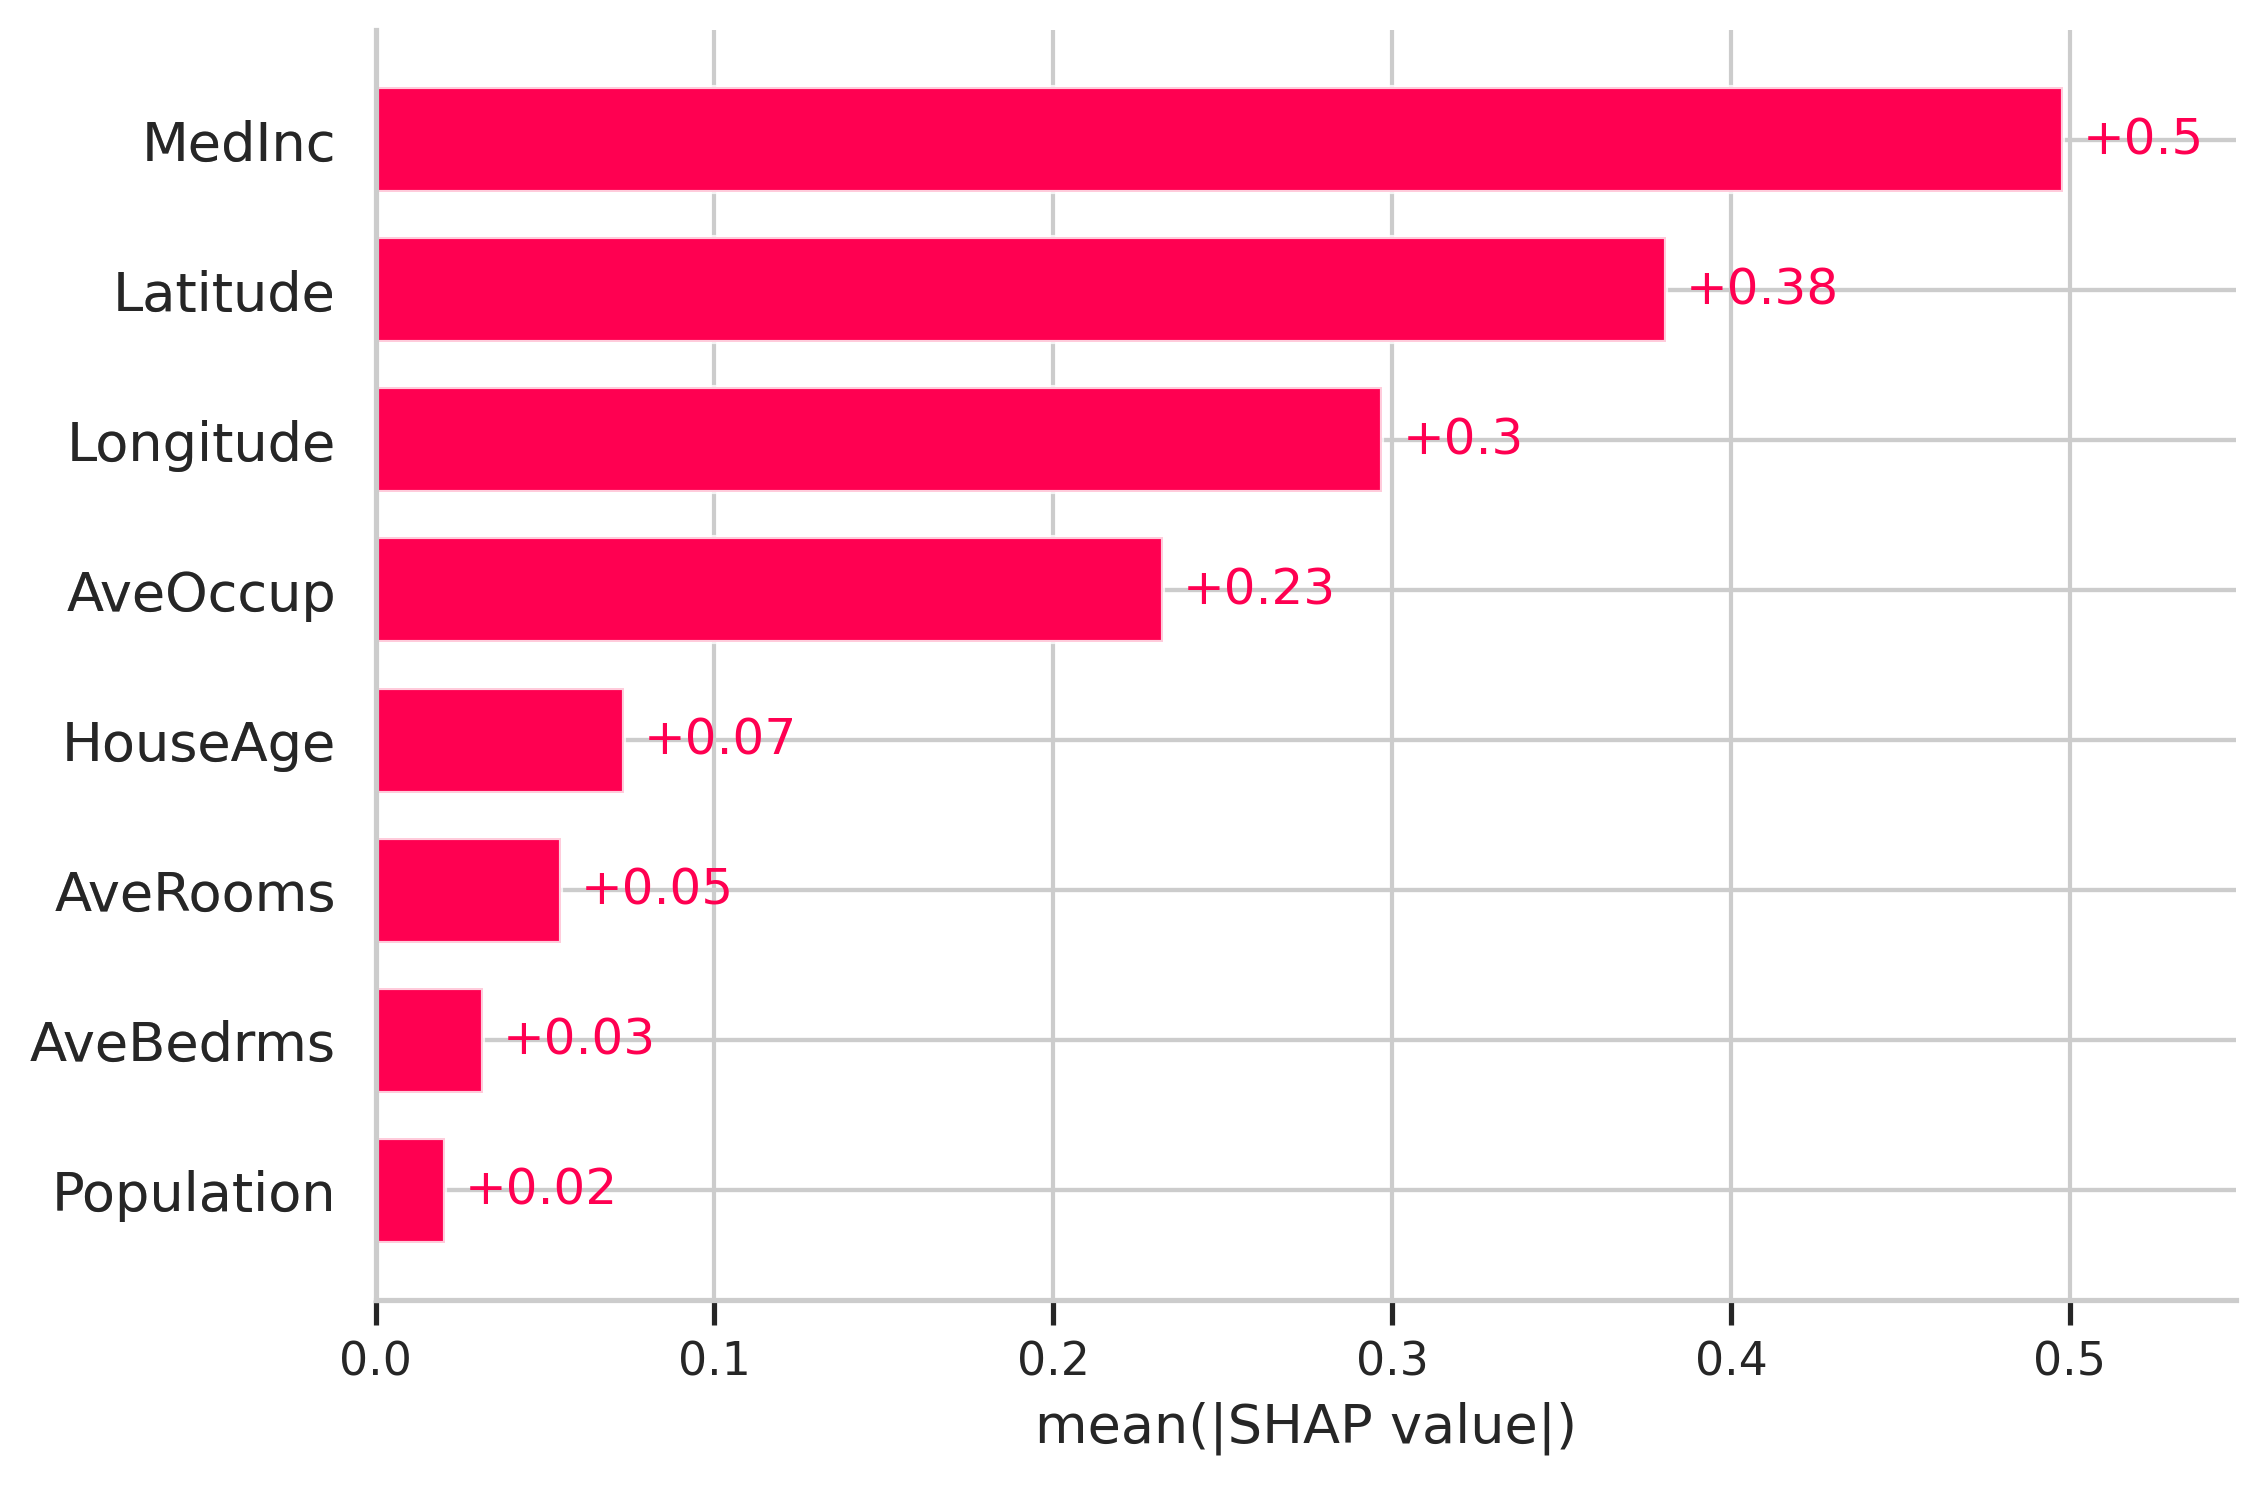

In [7]:
shap.plots.bar(shap_values)

여기에서 features는 예측에 가장 높은 영향을 미치는 것부터 가장 낮은 영향까지 순서가 지정됩니다. 여기서는 absolute SHAP 값을 고려하므로 features가 예측에 긍정적인 영향을 미치는지 부정적인 영향을 미치는지는 중요하지 않습니다.

## Summary plot: beeswarm

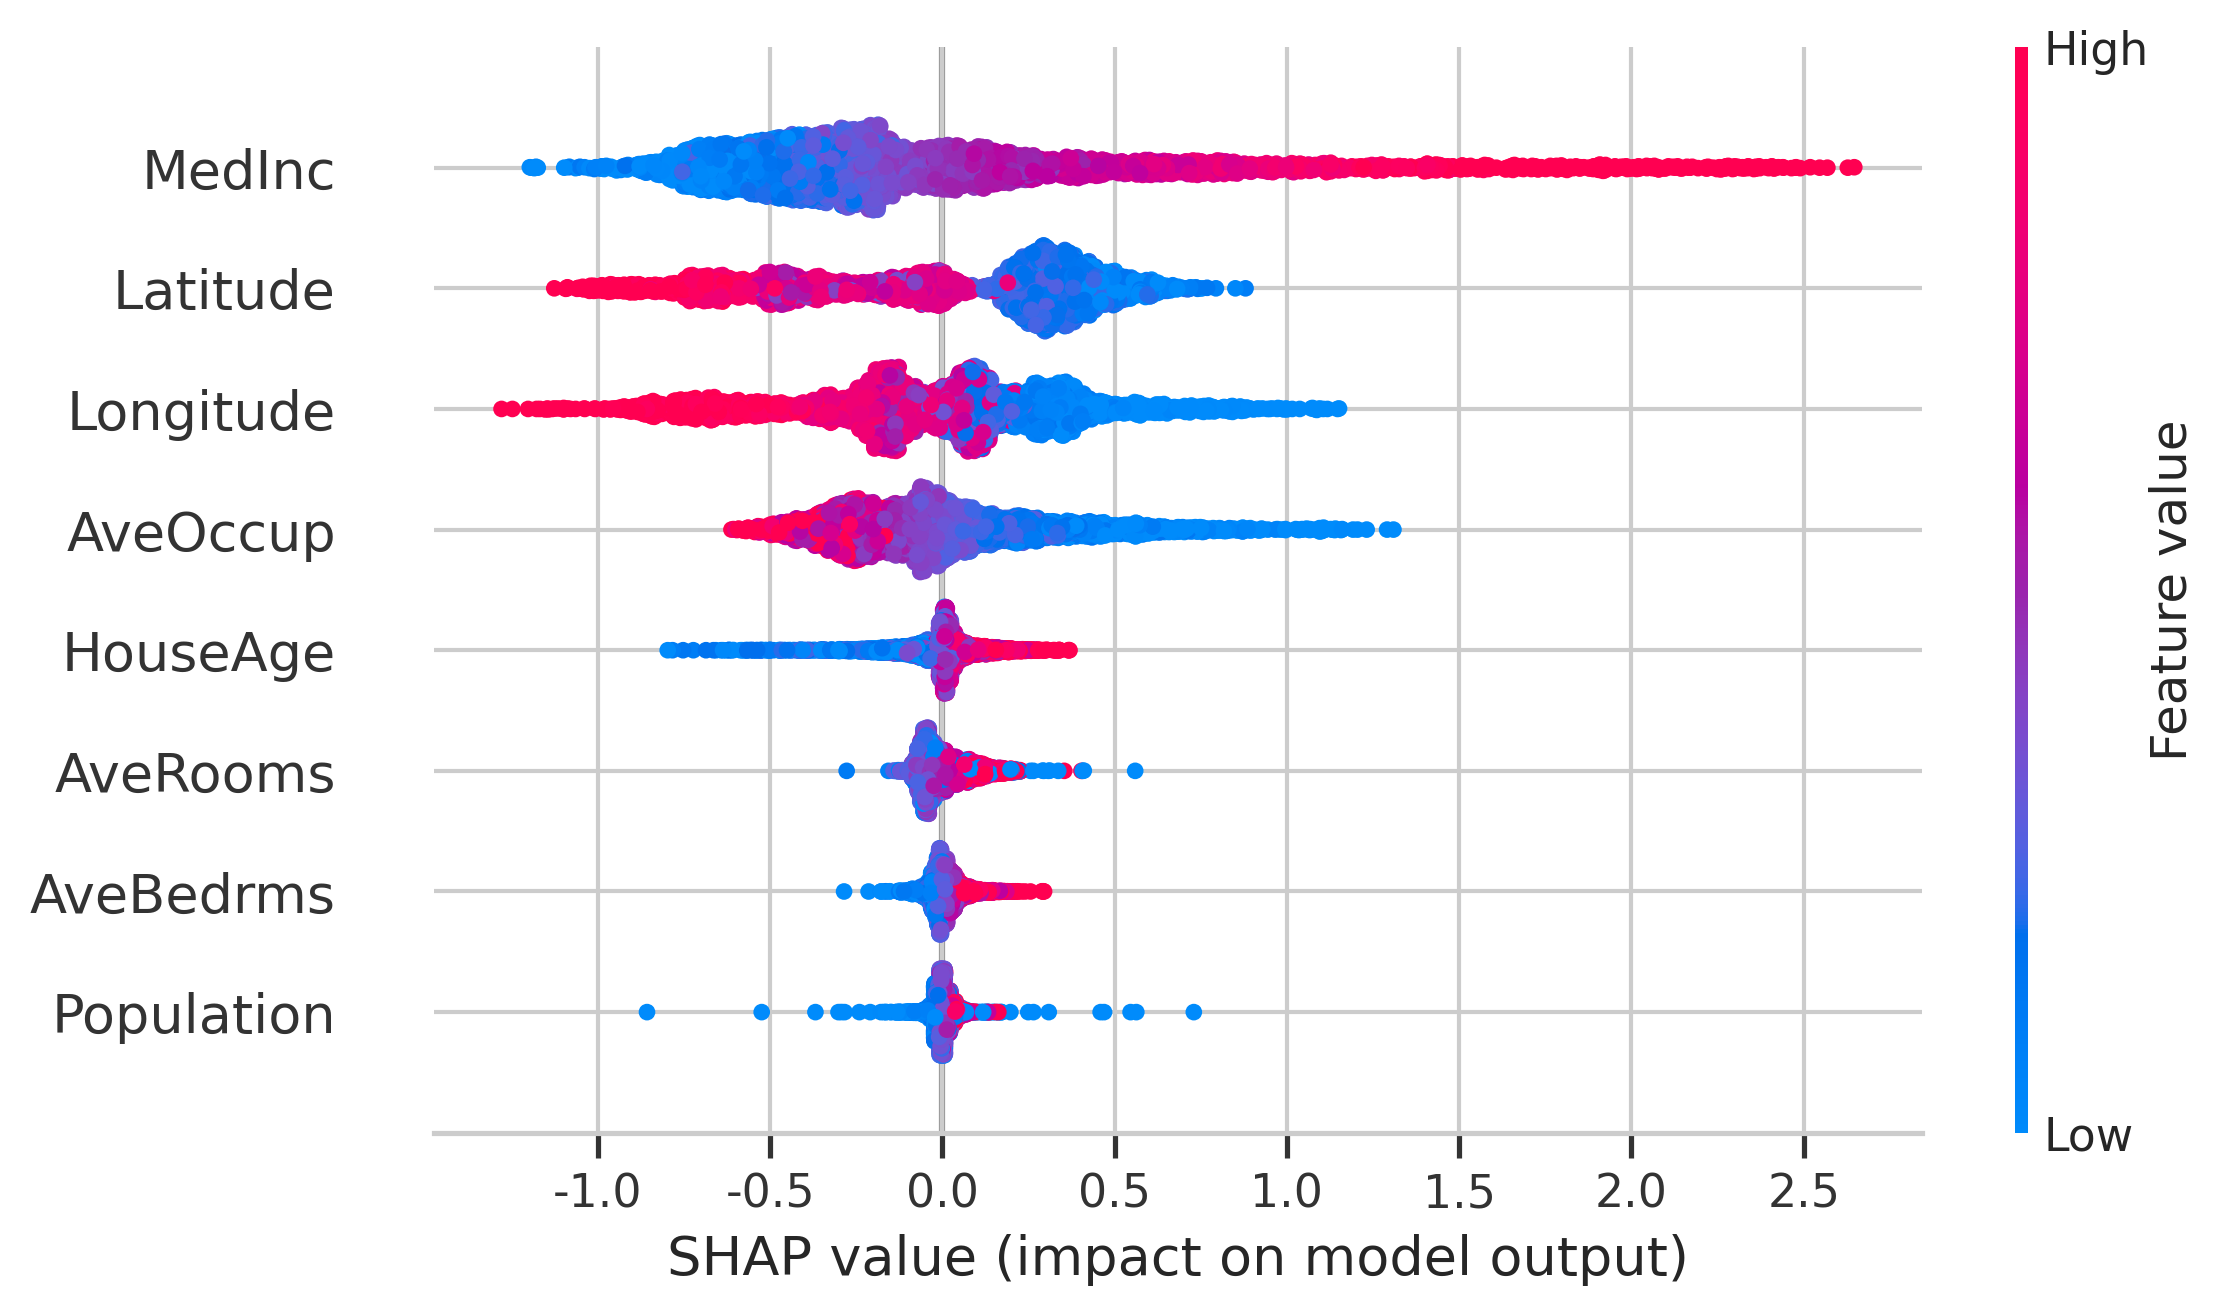

In [8]:
shap.plots.beeswarm(shap_values)
# shap.summary_plot(shap_values)

beeswarm에서 feature는 예측에 미치는 영향에 따라 정렬되지만, features의 더 높거나 낮은 값이 결과에 얼마나 영향을 미치는지 확인할 수도 있습니다.

plot의 모든 작은 점은 단일 관측치를 나타냅니다. 가로축은 SHAP 값을 나타내고 점의 색상은 다른 observations와 비교할 때 해당 observations의 값이 더 높거나 낮은지를 보여줍니다.

이 예에서 latitude와 longitude가 높을수록 예측에 negative한 영향을 미치고 값이 낮을수록 positive한 영향을 미칩니다.

## Summary plot: violin
beeswarm의 정보를 보는 다른 방법은 violin plot을 사용하는 것입니다:

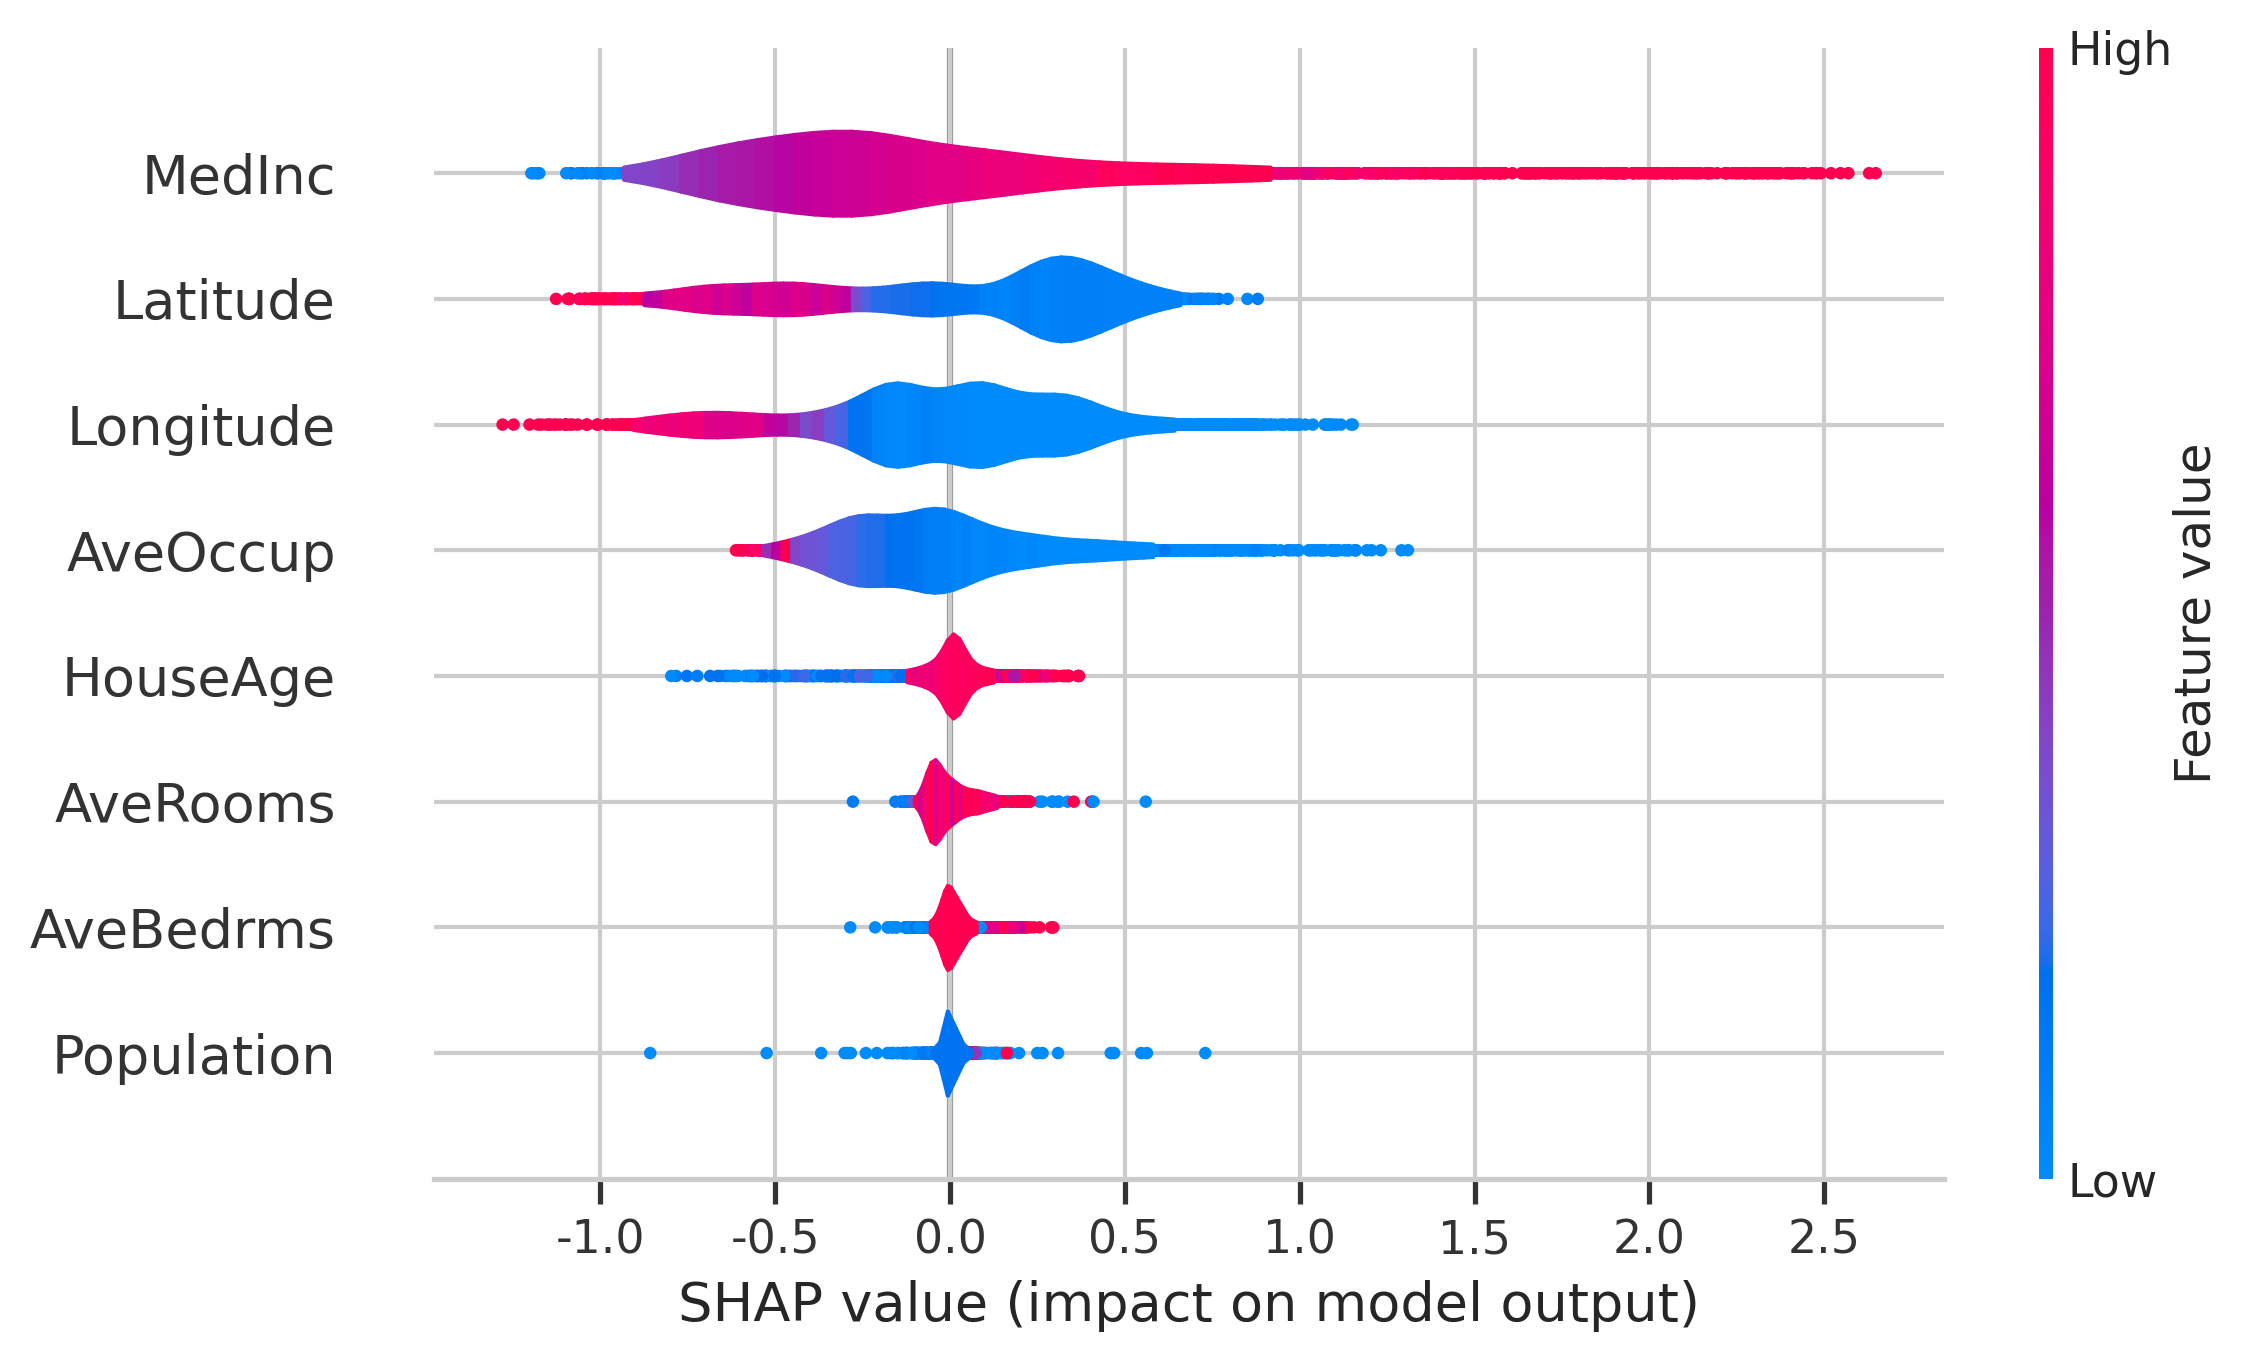

In [9]:
shap.summary_plot(shap_values, plot_type='violin')

local instance별 효과를 분석하기 위해 단일 observation에 대해 다음 plot을 사용할 수 있습니다(아래 예에서는 ```shap_values[0]```을 사용했습니다).

## Local bar plot

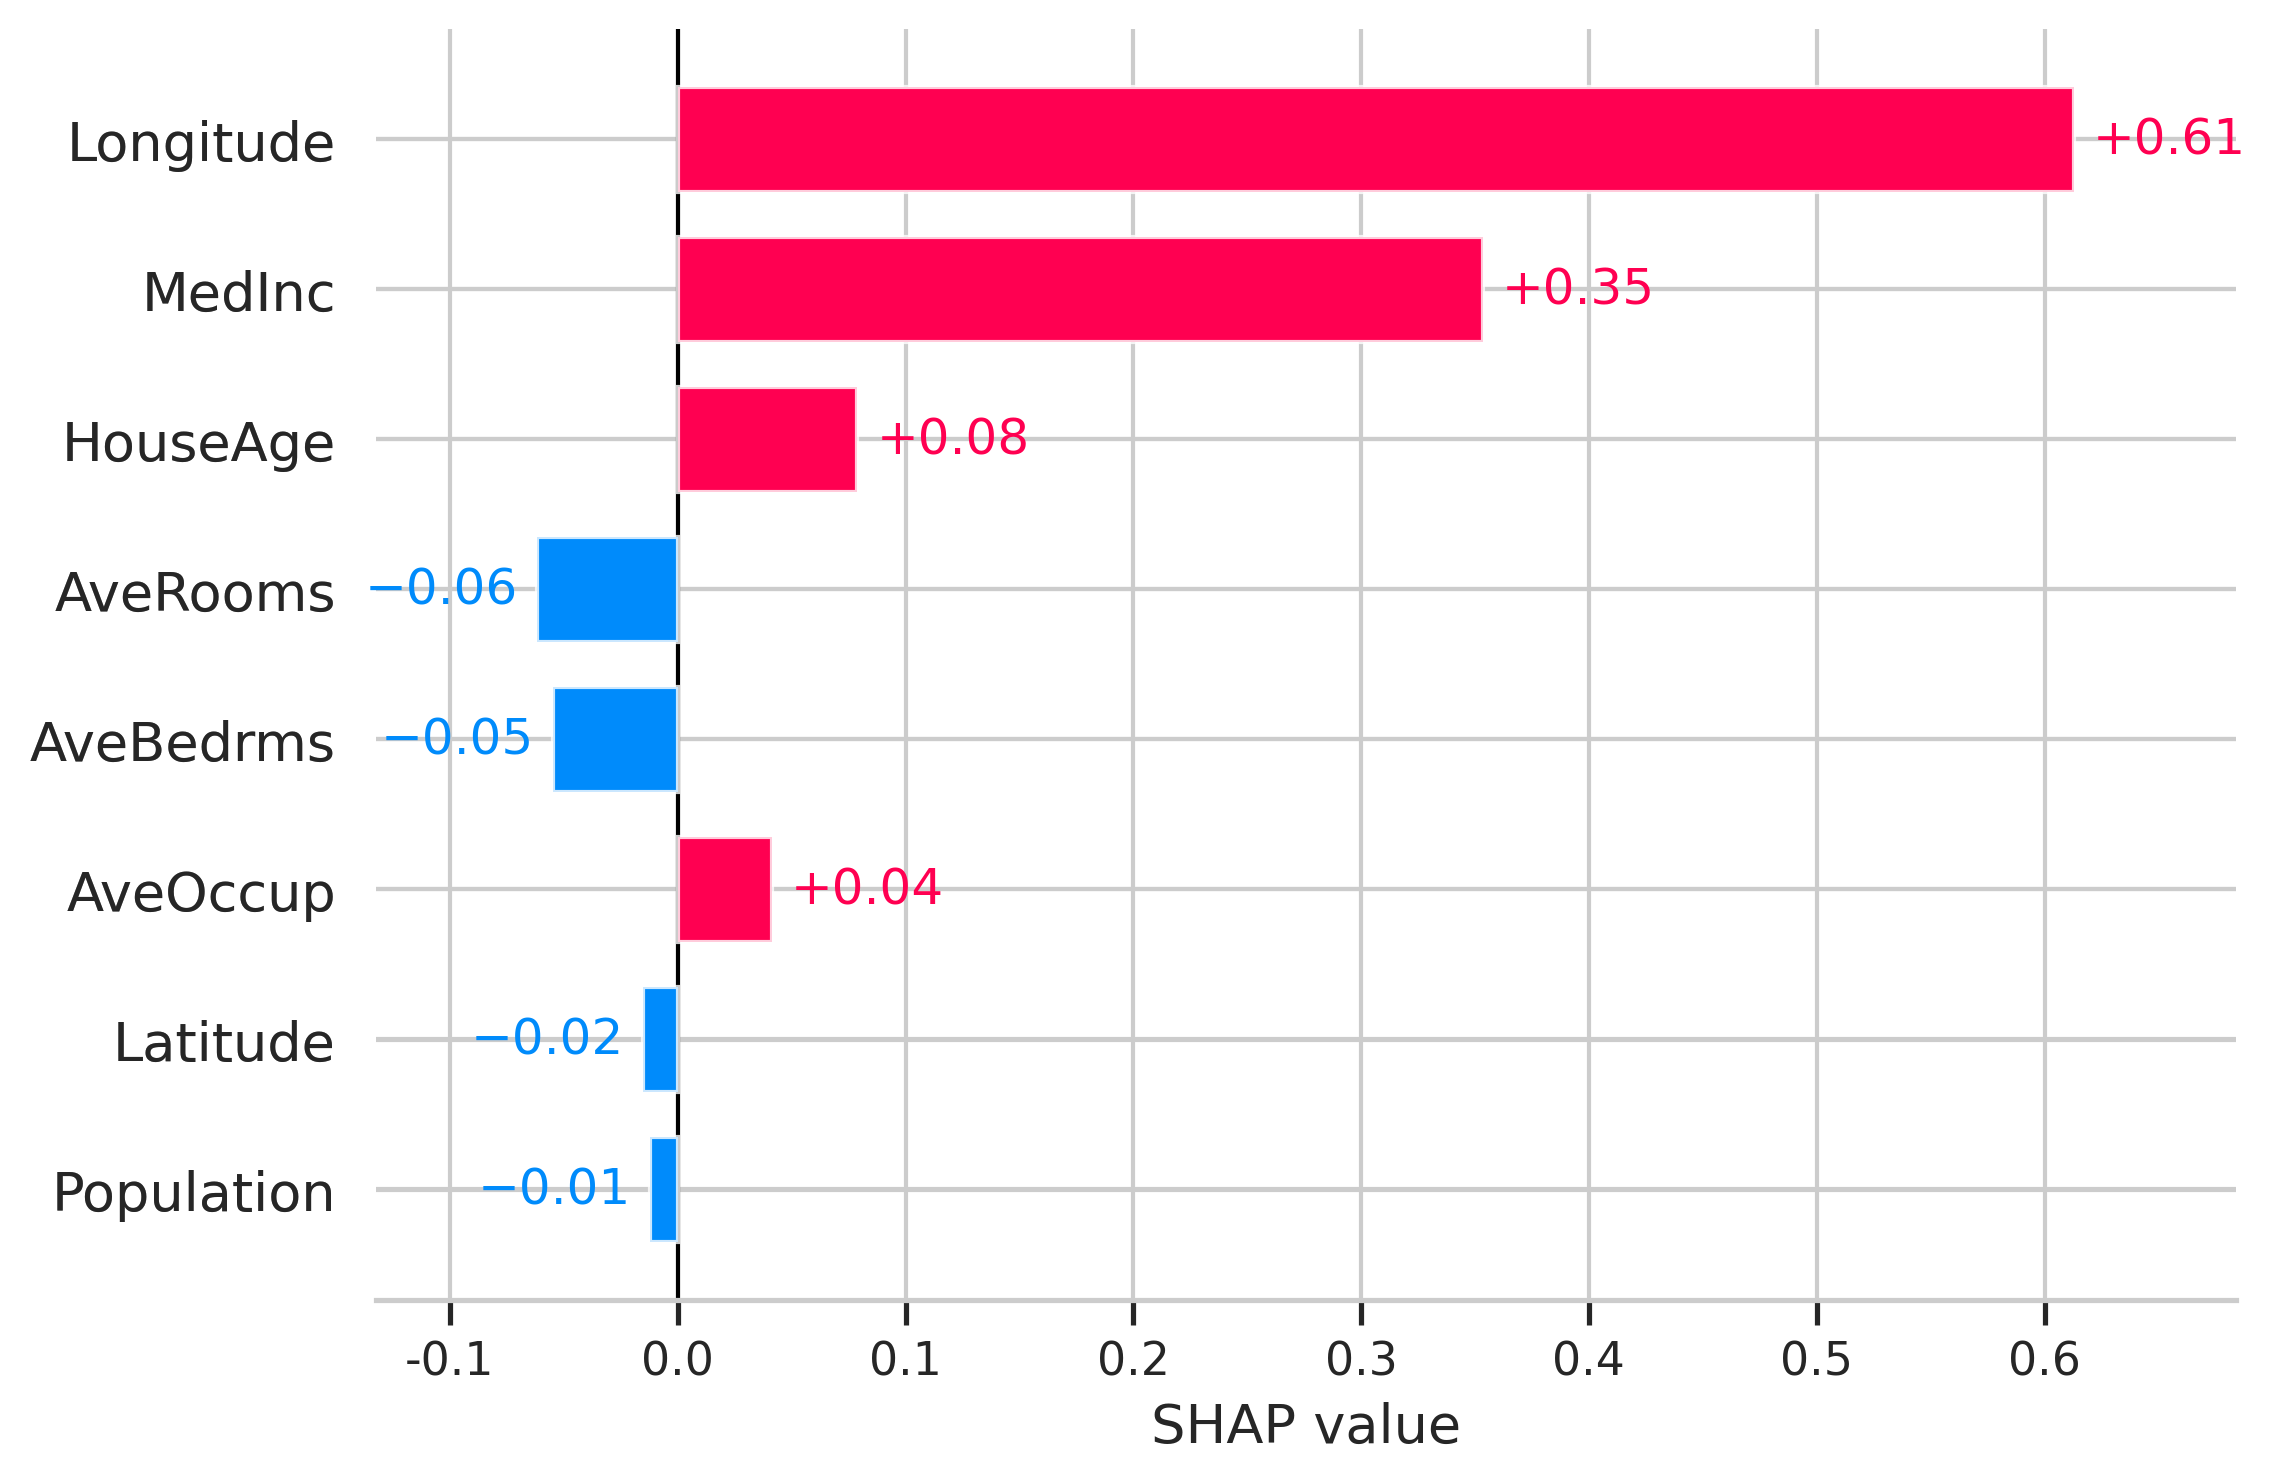

In [10]:
shap.plots.bar(shap_values[0])

이 plot은 단일 observation의 예측에 영향을 미치는 주요 features와 각 feature에 대한 SHAP 값의 크기를 보여줍니다.

## Waterfall plot

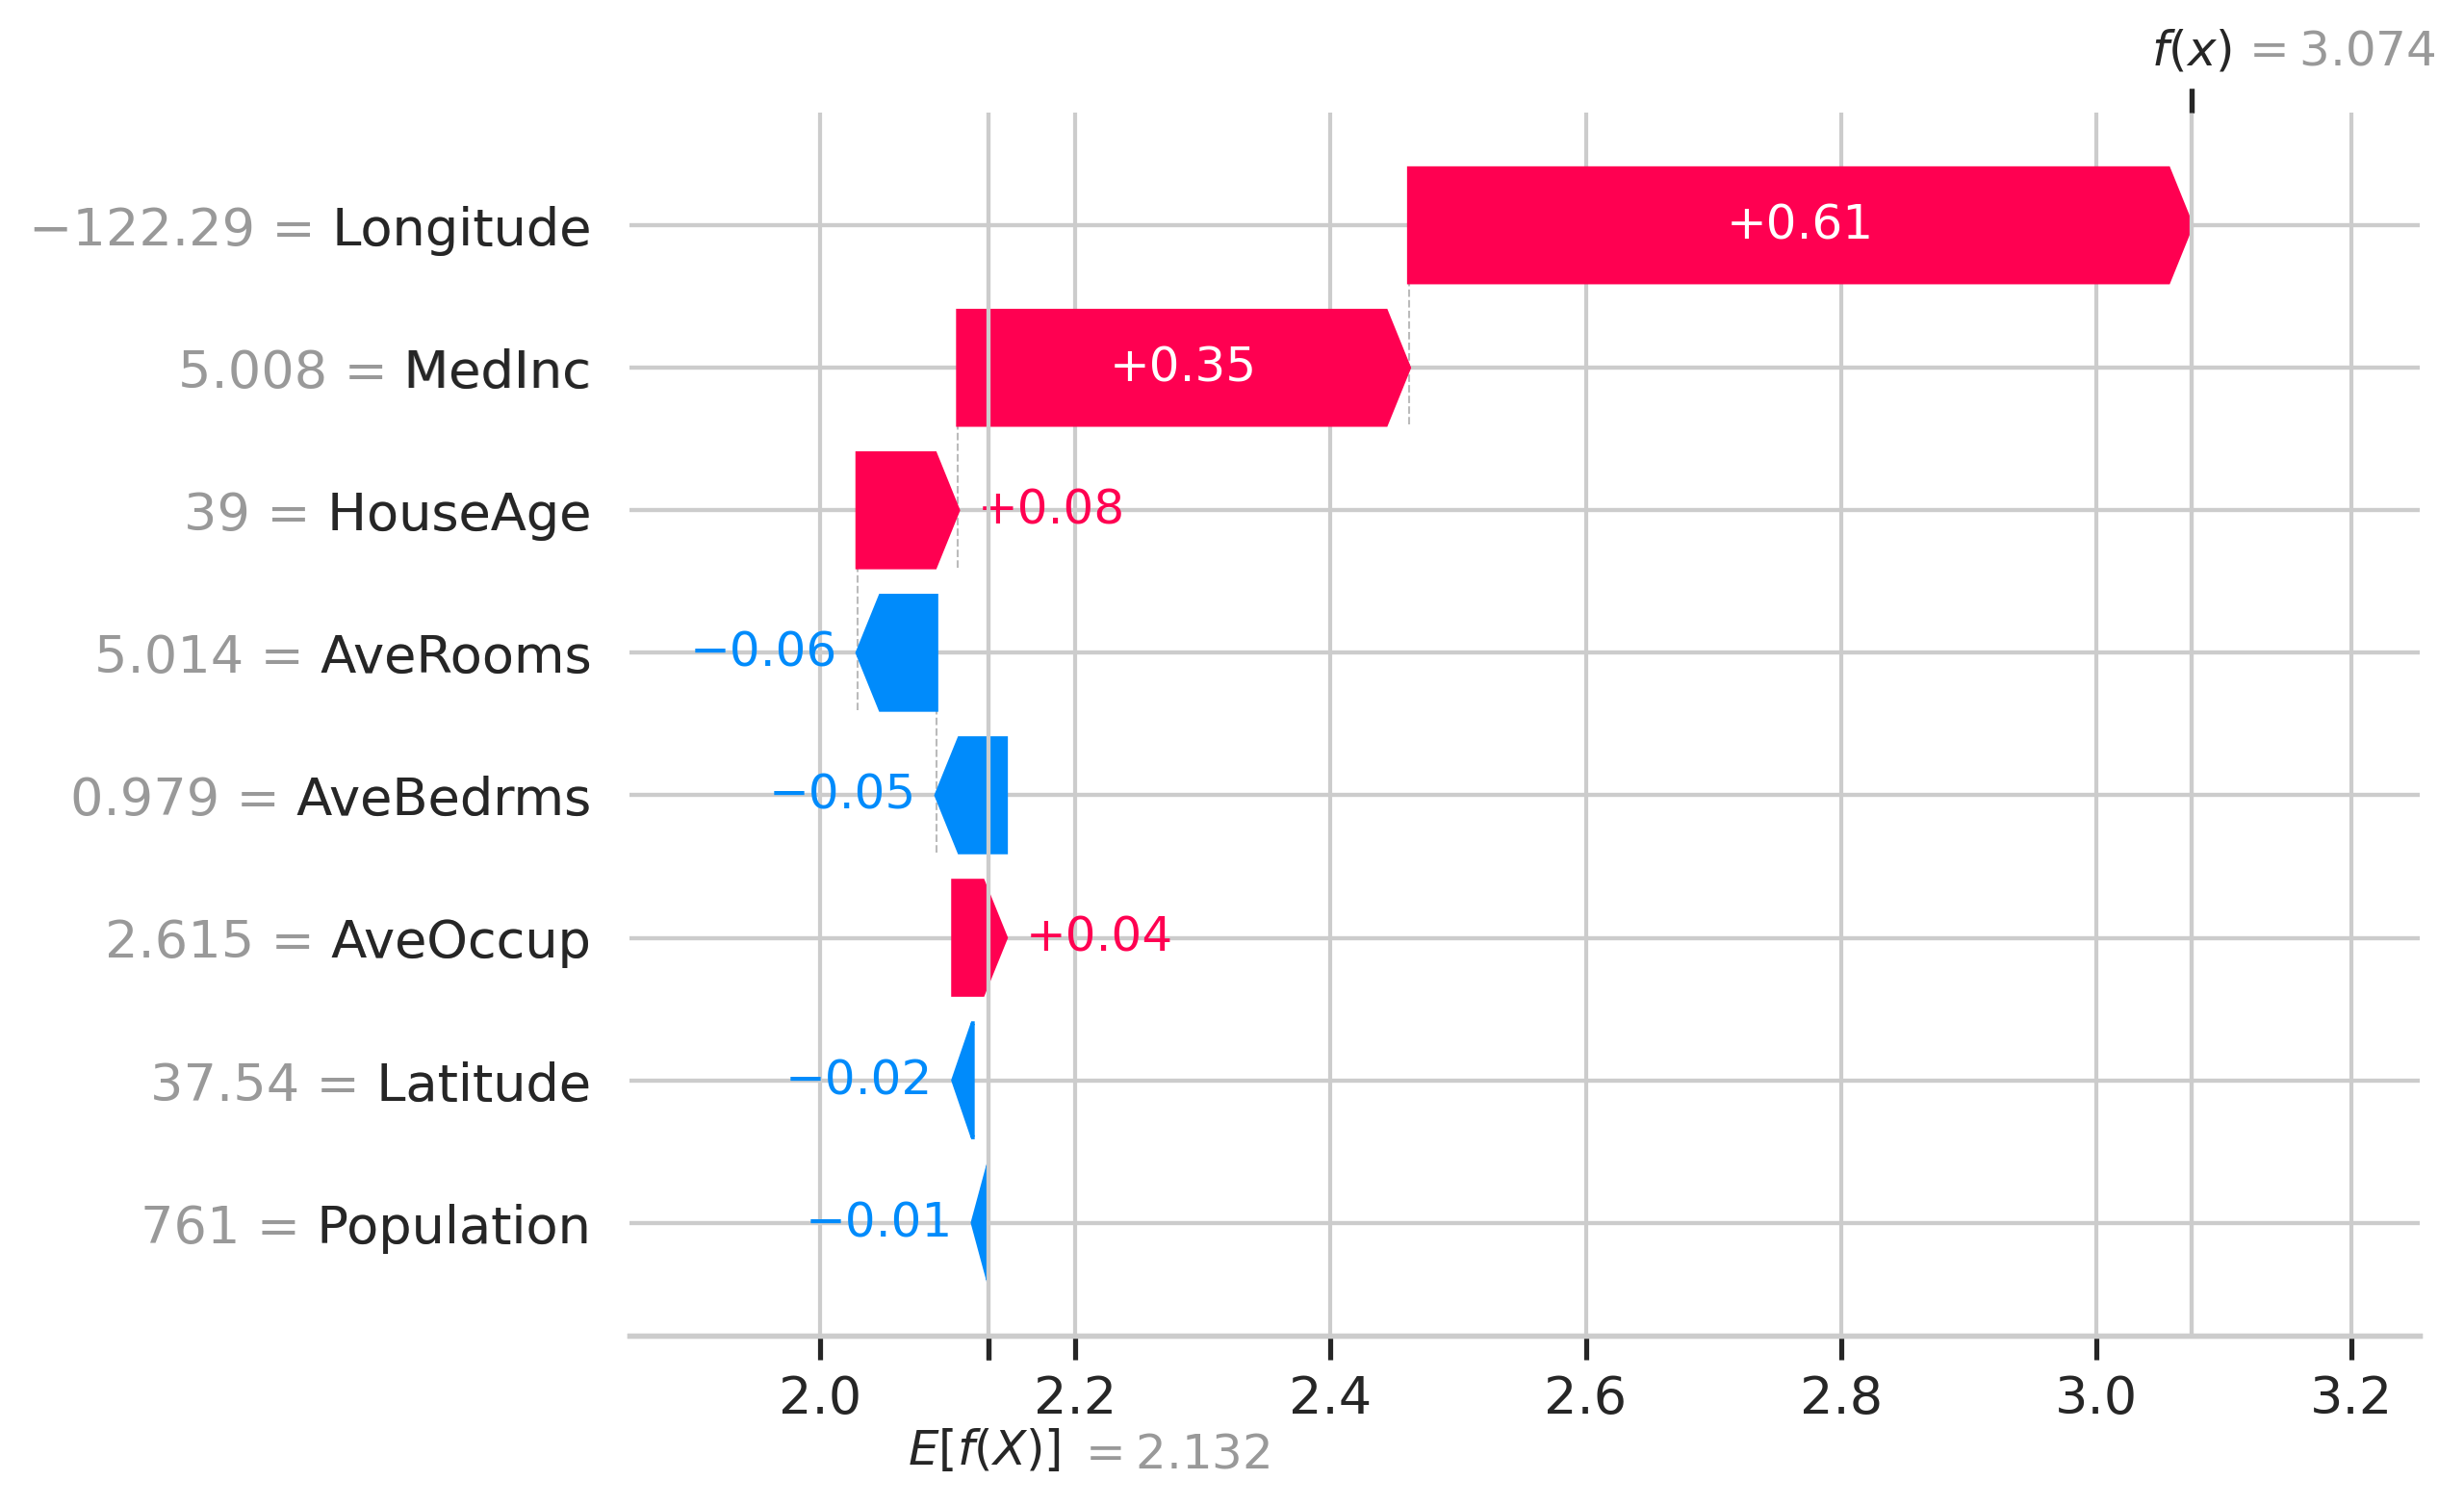

In [11]:
shap.plots.waterfall(shap_values[0])

waterfall plot은 다른 방식으로 표시되는 동일한 정보를 갖습니다. 여기에서 모든 SHAP 값의 합이 prediction f(x)와 기댓값 E[f(x)] 간의 차이와 어떻게 같은지 확인할 수 있습니다.

## Force plot

In [14]:
shap.plots.force(shap_values[0])

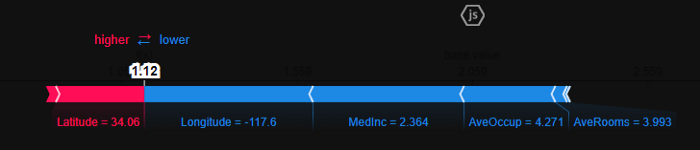

force plot은 주어진 observation에 대해 각 features가 예측에 미치는 영향을 확인하는 또 다른 방법입니다. 이 plot에서 positive SHAP 값은 서로 경쟁하는 것처럼 왼쪽에 표시되고 음수 값은 오른쪽에 표시됩니다. 강조 표시된 값은 해당 observation에 대한 예측입니다.

# Conclusion
이 아티클이 SHAP 값을 사용하여 모델의 작동 방식을 설명하는 방법을 더 잘 이해하는 데 도움이 되었기를 바랍니다. 이는 모든 데이터 과학자가 가지고 있어야 하는 tool이며, 우리는 이것을 모든 모델에 사용해야 합니다.

이 아티클에 대한 노트북을 확인해주세요:

[https://github.com/vinyluis/Articles/tree/main/Boruta%20SHAP](https://github.com/vinyluis/Articles/tree/main/Boruta%20SHAP)